Survived
0    549
1    340
Name: count, dtype: int64
Survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64


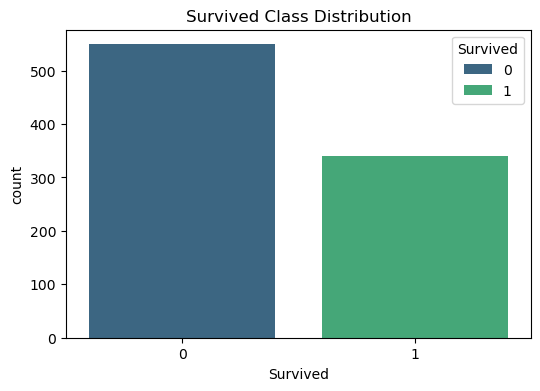

Accuracy: 70.22%
Confusion Matrix:
[[89 20]
 [33 36]]


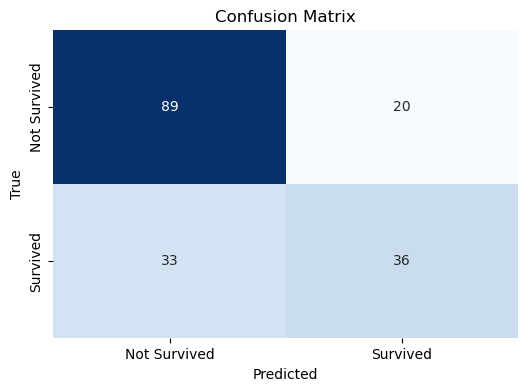

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로딩
df = pd.read_csv("C:\\Users\\LG\\Downloads\\titanic.csv", index_col=0)

# 2. 결측치 확인 및 처리
df['Age'] = df['Age'].fillna(df['Age'].mean())  # 'Age' 컬럼 결측값 평균으로 대체
df.dropna(subset=['Embarked'], inplace=True)  # 'Embarked' 컬럼의 결측값 제거

# 3. 레이블 분포 확인 (Imbalanced Data 확인)
print(df['Survived'].value_counts())  # Survived 컬럼의 클래스 분포 확인
print(df['Survived'].value_counts(normalize=True))  # 클래스 비율 확인

# Survived 컬럼의 클래스 분포 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Survived', data=df, palette='viridis')
plt.title('Survived Class Distribution')
plt.show()

# 4. 필요없는 컬럼 제거
df = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# 5. 인코딩
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # 'male'은 0, 'female'은 1로 변환

# 6. 특성과 목표 변수 설정
X = df.drop('Survived', axis=1)  # 특성 (독립 변수)
y = df['Survived']  # 목표 변수 (종속 변수)

# 7. 데이터 분할 (학습용 80%, 테스트용 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. KNN 모델 학습
knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5로 설정
knn_model.fit(X_train, y_train)

# 9. 예측
y_pred = knn_model.predict(X_test)

# 10. 정확도 확인
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 11. 혼동 행렬 확인
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 12. 혼동 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()